In [8]:
import boto3
import os
import json
import docx
from IPython.display import Markdown, display
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


region = os.environ.get("AWS_REGION")
boto3_bedrock = boto3.client(service_name='bedrock-runtime')
from claude3 import Analyticsfunction, extract_python_code, detect_shape


obj = Analyticsfunction()
    
claude3 = obj.call_claude_sonet_text

In [2]:
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)

In [3]:
note = getText("Vector-notes.docx")

In [4]:
prompt =f'''Human: create question 2 multiple choice question and answer

<book>
{note}
</book>

Assistant:'''

body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000, "temperature": 0.8})
text = claude3(body)
display(Markdown(text))

Based on the given information, here are two multiple choice questions with answers:

Question 1: What is the scalar triple product of three vectors a, b, and c?
Options:
(1) a . (b x c)
(2) (a x b) . c
(3) a . b . c
(4) Both (1) and (2)

Answer: (4) Both (1) and (2)

Question 2: If three vectors a, b, and c are coplanar, then their vector triple product is:
Options: 
(1) Non-zero
(2) Zero
(3) Undefined
(4) Depends on the magnitude of the vectors

Answer: (2) Zero

In [5]:
context = "ABCDEF is a hexagon (six-sided polygon). Find the value of AB+BC+CD+DE+AF+FE+AE "

In [6]:
prompt =f'''Human: write python code to draw hexagon using matplotlib
1. save as jpg
2. context into the image at top. 
3. draw correct shape
4. complete all edges
<context>
{context}
</context>

Assistant:'''

body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000, "temperature": 0.8})

In [7]:
text = claude3(body)

In [8]:
output_file = "output_python_code.py"  # Change this to your output file
extract_python_code(text, output_file)

In [9]:
display(Markdown(text))

Here's a Python code that uses the Matplotlib library to draw a hexagon, save it as a JPG file, and include the given context at the top of the image:

```python
import matplotlib.pyplot as plt
import numpy as np

# Define the vertices of the hexagon
vertices = np.array([[0, 0], [2, 0], [3, 1.73], [2, 3.46], [0, 3.46], [-1, 1.73]])

# Define the context
context = "ABCDEF is a hexagon (six-sided polygon). Find the value of AB+BC+CD+DE+AF+FE+AE"

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the hexagon
ax.plot(vertices[:, 0], vertices[:, 1], 'k-', linewidth=2)
ax.plot([vertices[-1, 0], vertices[0, 0]], [vertices[-1, 1], vertices[0, 1]], 'k-', linewidth=2)  # Complete the last edge

# Add the context at the top
ax.text(0, 4.5, context, fontsize=12, ha='center', va='top')

# Set axis limits and remove ticks
ax.set_xlim([-2, 4])
ax.set_ylim([-1, 5])
ax.set_xticks([])
ax.set_yticks([])

# Save the figure as a JPG file
plt.savefig('hexagon.jpg', dpi=300, bbox_inches='tight')

# Display the figure (optional)
plt.show()
```

Explanation:

1. We import the necessary libraries: `matplotlib.pyplot` for plotting and `numpy` for array operations.
2. We define the vertices of the hexagon using a NumPy array.
3. We define the context string.
4. We create a figure and axis using `plt.subplots()`.
5. We plot the hexagon using `ax.plot()`, connecting the vertices with lines. We also add the last edge separately to complete the hexagon.
6. We add the context at the top of the plot using `ax.text()`.
7. We set the axis limits and remove the ticks using `ax.set_xlim()`, `ax.set_ylim()`, `ax.set_xticks()`, and `ax.set_yticks()`.
8. We save the figure as a JPG file using `plt.savefig()`.
9. We display the figure using `plt.show()` (optional).

This code will generate a JPG file named `hexagon.jpg` in the same directory as the Python script, containing the hexagon shape with the context text at the top.

Note: The aspect ratio of the hexagon may not be perfect due to the coordinate system used in Matplotlib. You can adjust the vertex coordinates or the figure size to achieve the desired aspect ratio.

In [10]:
!python3 output_python_code.py

Figure(800x600)


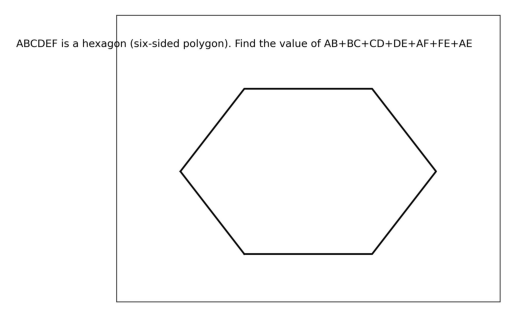

In [11]:
# Load the image
img = mpimg.imread('hexagon.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis ticks and labels
plt.show()

In [1]:
import time

In [9]:
def create_image(question):
    shape  = detect_shape(question)
    print(shape)
    prompt = f'''Human: write advanced python code to draw {shape} using Seaborn visualisation
        1. Save plot as {shape}.jpg, plot context/question at top.create small image
        2. context into the image at top. 
        3. draw correct shape
        4. complete all edges and align properly
        5. Label each edge or component with alphabets (e.g., A, B, etc.) for better understanding.
        6. must import all necessary library in the output
        
        <question>
        {question}
        </question>

        Assistant:'''
    body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000, "temperature": 0.8})
    text = claude3(body)
    #text = claude2(prompt)
    image = f'{shape}'
    output_file = "main.py"
    extract_python_code(text, output_file)
    time.sleep(2)
    #display(Markdown(text))
    !python3 main.py
      # Wait for 5 seconds to allow the image to be generated
    time.sleep(2)
    print(image)
    img = mpimg.imread(image+".jpg")
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axis ticks and labels
    plt.show()

In [10]:
context = "ABCDEF is a hexagon (six-sided polygon). Find the value of AB+BC+CD+DE+AF+FE+AE "

In [11]:
create_image(context)

NameError: name 'claude3' is not defined

In [ ]:
context1 = "If the adjacent sides of a parallelogram are 3i+2j and -i+4j+2k, find the area of the parallelogram."

parallelogram
succesfuly
parallelogram


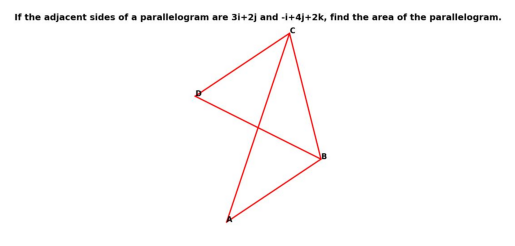

In [ ]:
create_image(context1)

In [ ]:
context2 =  "If the position vectors of the vertices A, B, and C of a triangle △ABC are αi+βj+γk, βi+γj+αk, and γi+αj+βk respectively, then △ABC is "

isosceles_triangle
succesfuly
isosceles_triangle


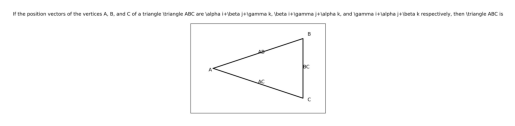

In [ ]:
create_image(context2)

In [ ]:
context3 = "calculate area of circle where raisus is r"

circle
succesfuly
Figure(400x400)
circle


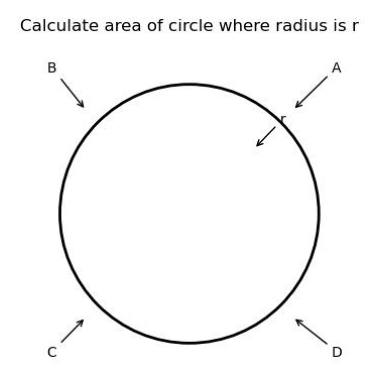

In [ ]:
create_image(context3)

In [ ]:
context4 = "what is area of rectangle whose length is l and width is w"

rectangle
succesfuly
Figure(600x400)
The area of the rectangle with length 10 and width 6 is: 60
rectangle


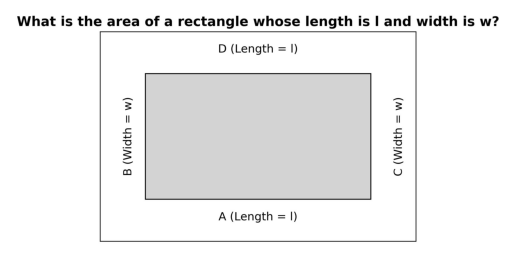

In [ ]:
create_image(context4)

In [ ]:
context4 = "What does the triangle law state in the context of vectors? According to the diagram, the triangle law states that p + q + r = 0 for the three vectors p, q, and r forming a triangle."

triangle
succesfuly
Figure(600x400)
triangle


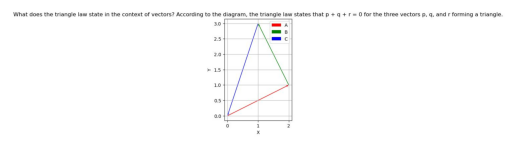

In [ ]:
create_image(context4)